In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import mean_absolute_error, mean_absolute_error,r2_score, confusion_matrix, auc, accuracy_score, roc_curve, classification_report,roc_auc_score
import numpy as np

In [258]:
df = pd.read_csv("weight-height (1).csv")

In [259]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [260]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [261]:
df['Gender'].value_counts()

Gender
Male      5000
Female    3555
Name: count, dtype: int64

In [262]:
y = df[['Gender']]
x = df.drop(['Gender'], axis=1)

In [263]:
# oneHot = OneHotEncoder()
label = LabelEncoder()

In [264]:
y = label.fit_transform(y)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [265]:
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state= 42, test_size=.2)

In [266]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6844, 2), (6844,), (1711, 2), (1711,))

In [267]:
smote = SMOTE()

In [268]:
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [269]:
x_train.shape, y_train.shape

((6844, 2), (6844,))

In [270]:
x_train_balanced.shape

(7990, 2)

In [271]:
y_train_balanced.shape

(7990,)

In [272]:
log = LogisticRegression()

In [273]:
log_reg = log.fit(x_train_balanced, y_train_balanced)

In [ ]:
c = log_reg.intercept_
m = log_reg.coef_

In [ ]:
x_test.iloc[0]

array([-0.46329024,  0.19095476])

In [337]:
z = (64.846644 * m[0][0]) + (149.668369 *  m[0][1]) + c
z

array([-1.4726464])

In [344]:
positive_proba = 1 / (1 + 2.718281828459045 ** -z)
negative_proba = 1 - positive_proba

In [345]:
negative_proba, positive_proba

(array([0.81345929]), array([0.18654071]))

In [349]:
pre = (1 if positive_proba > negative_proba else 0)
pre

0

In [341]:
log_reg.predict_proba(x_test)[0]

array([0.81345932, 0.18654068])

In [274]:
log_reg.score(x_train_balanced, y_train_balanced)

0.9175219023779725

In [275]:
log_reg.score(x_test, y_test)

0.9275277615429574

In [276]:
y_pred = log_reg.predict(x_test)

In [277]:
accuracy_score(y_test, y_pred)

0.9275277615429574

In [278]:
cm = confusion_matrix(y_test, y_pred)

In [279]:
cm

array([[648,  58],
       [ 66, 939]])

<Axes: >

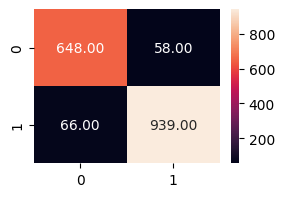

In [280]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='.2f')

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       706
           1       0.94      0.93      0.94      1005

    accuracy                           0.93      1711
   macro avg       0.92      0.93      0.93      1711
weighted avg       0.93      0.93      0.93      1711



### AUC–ROC

In [282]:
y_proba = log_reg.predict_proba(x_test)[:,1]

In [283]:
# # Positive class probability
y_proba

array([0.18654068, 0.99703122, 0.77009491, ..., 0.92591799, 0.99833062,
       0.57386704], shape=(1711,))

In [284]:
# AUC score বের করা
auc_score = roc_auc_score(y_test, y_proba)

In [285]:
auc_score

0.9791735374120898

In [286]:
# ROC Curve এর values
fpr, tpr, threshold = roc_curve(y_test, y_proba)

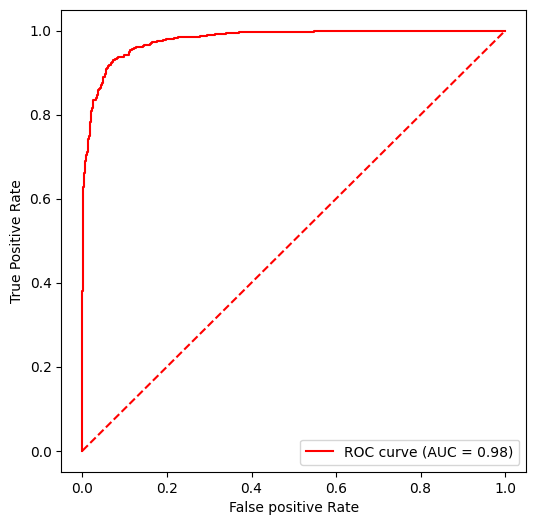

In [287]:
# ROC Curve plot

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color = 'red', label = f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

In [289]:
Knn = KNeighborsClassifier(n_neighbors=5)

In [290]:
Knn_cla = Knn.fit(x_train_balanced, y_train_balanced)

In [291]:
Knn_cla.score(x_train_balanced, y_train_balanced)

0.9332916145181477

In [292]:
Knn.score(x_test, y_test)

0.9170075978959673

In [293]:
y_pred_knn = Knn_cla.predict(x_test)

In [294]:
accuracy_score(y_pred_knn, y_test)

0.9170075978959673

In [295]:
cm = confusion_matrix(y_pred_knn, y_test)

<Axes: >

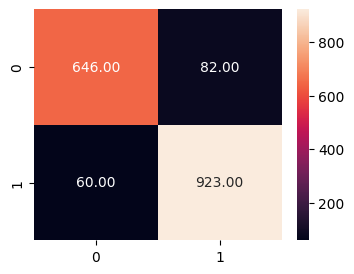

In [296]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True , fmt = '.2f')

In [301]:
y_proba_knn = Knn_cla.predict_proba(x_test)[:,1]

In [302]:
auc_score_knn = roc_auc_score(y_test,y_proba_knn)

In [303]:
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)

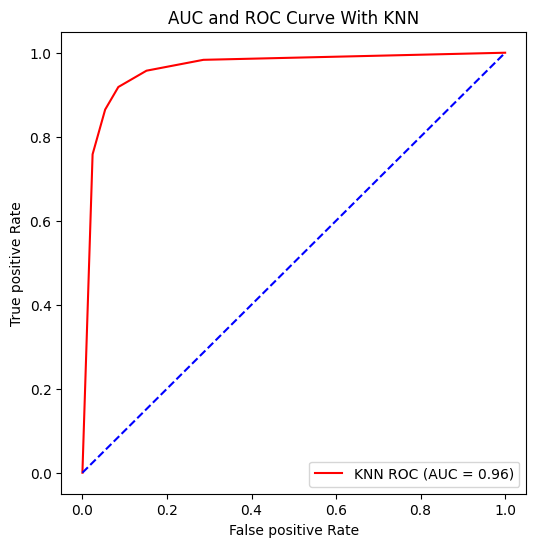

In [313]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color = 'red', label = f"KNN ROC (AUC = {auc_score_knn:.2f})")
plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
plt.title("AUC and ROC Curve With KNN")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()